# Trabajo 1 - Regresión logística        

El conjunto de datos Iris es un conjunto de datos clásico en el campo de la aprendizaje automático y la estadística. Fue introducido por el biólogo y estadístico británico Sir Ronald A. Fisher en 1936 como un ejemplo de análisis discriminante. El conjunto de datos Iris consta de 150 observaciones de iris de tres especies diferentes: setosa, versicolor y virginica. Cada especie se representa con 50 muestras.

Cada muestra de iris tiene cuatro características (atributos) medidas en centímetros:

1. Longitud del sépalo (sepal length)
2. Ancho del sépalo (sepal width)
3. Longitud del pétalo (petal length)
4. Ancho del pétalo (petal width)

El objetivo principal de este conjunto de datos es clasificar las flores de iris en una de las tres especies en función de estas cuatro características. Esto lo convierte en un problema de clasificación supervisada común en el campo de la inteligencia artificial y el aprendizaje automático.

El conjunto de datos Iris es a menudo utilizado como un punto de partida en la enseñanza y evaluación de algoritmos de clasificación debido a su simplicidad y claridad. Además, se ha convertido en un conjunto de datos de referencia en la comunidad científica para demostrar y comparar métodos de clasificación y análisis de datos.

### EDA

Instalamos las distintas librerías necesarias 

In [47]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
import pandas as pd
import plotly.express as px
import seaborn as sns

Cargamos y visualizamos la base de datos, primero traemos las variables explicativas 

In [5]:
iris = datasets.load_iris() # dataset es un metodo de sklearn
# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df


Ahora traemos las etiquetas

In [19]:
Y = iris.target

### Serie de pandas para la variable dependiente

Y_df = pd.Series(Y, name='species')
Y_df

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

cuyos nombres son

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

A continuación creamos una sola base de datos para su respectivo análisis 

In [36]:
DF_total= pd.concat([iris_df, Y_df], axis=1)
DF_total

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: xlabel='species', ylabel='sepal length (cm)'>

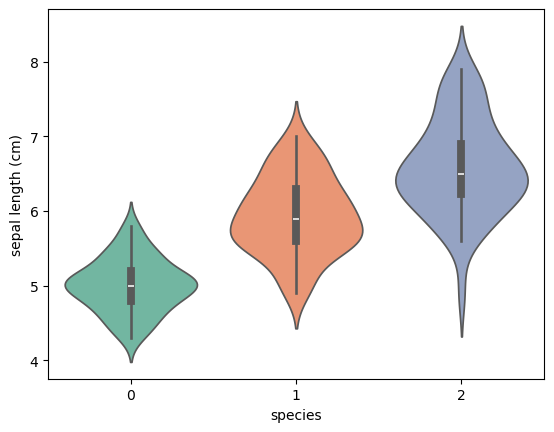

In [48]:
sns.violinplot(x = DF_total.iloc[:,4], y = DF_total.iloc[:,0],
               palette = "Set2")

<Axes: xlabel='species', ylabel='sepal width (cm)'>

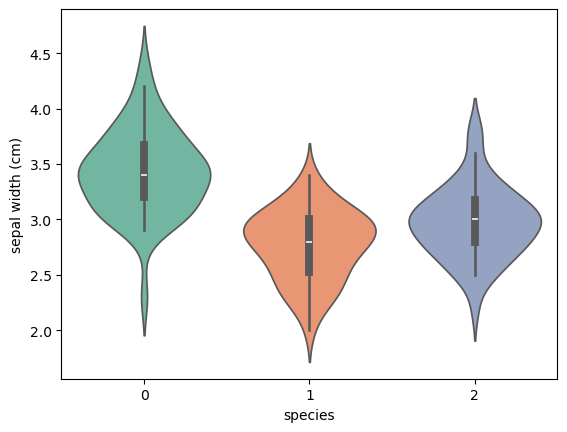

In [49]:
sns.violinplot(x = DF_total.iloc[:,4], y = DF_total.iloc[:,1],
               palette = "Set2")

<Axes: xlabel='species', ylabel='petal length (cm)'>

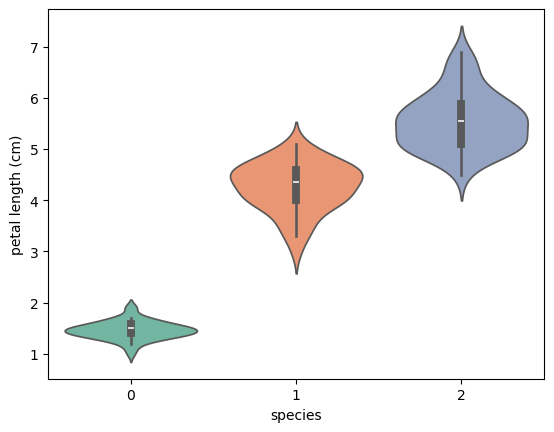

In [50]:
sns.violinplot(x = DF_total.iloc[:,4], y = DF_total.iloc[:,2],
               palette = "Set2")

<Axes: xlabel='species', ylabel='petal width (cm)'>

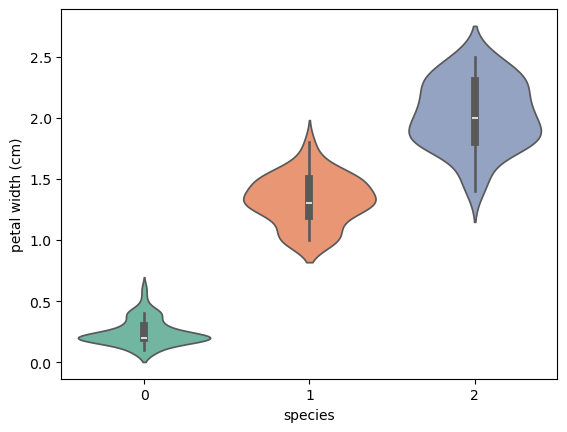

In [51]:
sns.violinplot(x = DF_total.iloc[:,4], y = DF_total.iloc[:,3],
               palette = "Set2")

De los anteriores gráficos podemos observar que :

-   Las Sentosa se caracteriza por tener menor ancho de sépalo, largo de pétalo y ancho de pétalo que las demás, pero tiene mayor ancho de sépalo 
-   Las Virginica se caracteriza por tener mayor ancho de sépalo, longitud  de pétalo y ancho de pétalo que las demás. 
-   LAs Versicolor se destacan por tener casi siempre mediadas intermedias.

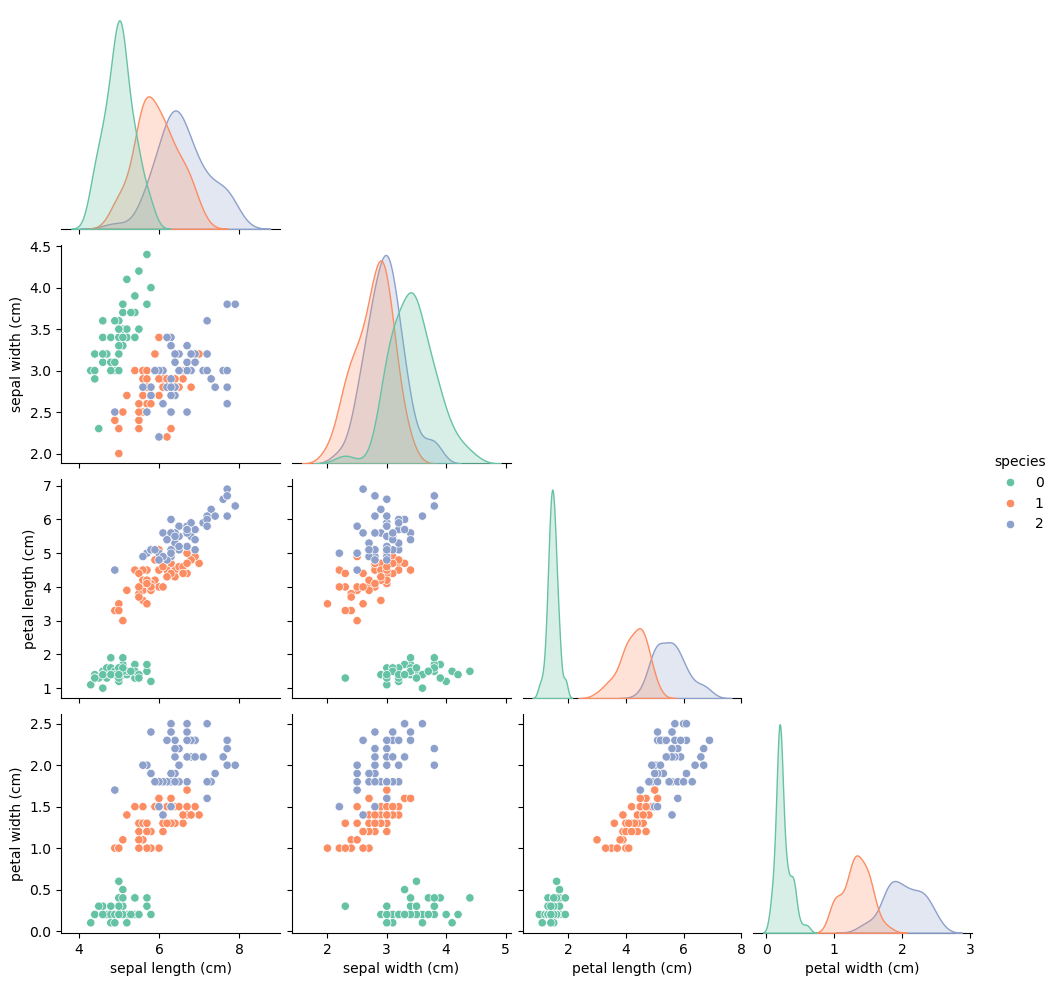

In [53]:
sns.pairplot(DF_total, hue = "species",
             corner = True,
             palette = "Set2") 
